# 7. Data og statistikk
## Lese inn data
### Oppgave 1
Vi kan bruke hvilket som helst datasett i råformat. Hvis du vil lage et selv, kan du for eksempel bruke Spyder og lagre fila som "filnavn.txt". Husk at fila må ligge i samme mappe som programmet. Hvis den ikke ligger der, må du spesifisere filstien (path) til tekstfila, slik vi har gjort nedenfor.

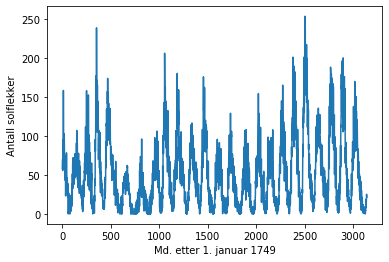

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('datasett/solflekker.txt', skiprows = 1)

tid = data[:,0]        # Måneder etter 1. januar 1749 til 2010
solflekker = data[:,1] # Gjennomsnittlig antall solflekker

plt.plot(tid, solflekker)
plt.ylabel('Antall solflekker')
plt.xlabel('Md. etter 1. januar 1749')
plt.show()

## Regresjon
### Oppgave 3
a)

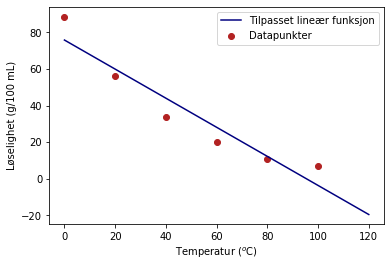

Modellen gir negativ løselighet ved T =  95.39999999999885


In [9]:
import numpy as np
import matplotlib.pyplot as plt

temp = [0, 20, 40, 60, 80, 100]
løselighet = [88.5, 56.0, 34.0, 20.0, 11.0, 7.0]

grad = 1
a, b = np.polyfit(temp,løselighet,grad)

x = np.linspace(0,120,1000)
y = a*x + b

plt.scatter(temp,løselighet,color='firebrick',label='Datapunkter')
plt.plot(x,y,color='navy',label='Tilpasset lineær funksjon')
plt.ylabel('Løselighet (g/100 mL)')
plt.xlabel('Temperatur ($^o$C)')
plt.legend()
plt.show()

# Sjekker ca. når modellen gir negativ løselighet
T = 0
while a*T + b >= 0:
    nullpunkt = a*T + b 
    T = T + 0.1
    
print("Modellen gir negativ løselighet ved T = ", T)

Vi ser at en lineær kurve ikke er spesielt godt tilpasset datasettet. Vi ser også at kurven gir negativ løselighet ved temperatu på ca. 95 grader celsius. Dette gir et omtrentlig gyldighetsområde på [0, 90] grader C.

b)

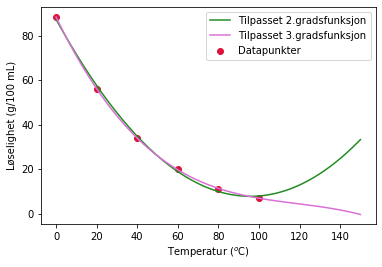

In [16]:
import numpy as np
import matplotlib.pyplot as plt

temp = [0, 20, 40, 60, 80, 100]
løselighet = [88.5, 56.0, 34.0, 20.0, 11.0, 7.0]

grad2 = 2
grad3 = 3
x = np.linspace(0,150,1000)

a, b, c = np.polyfit(temp,løselighet,grad2)
y2 = a*x**2 + b*x + c

a, b, c, d = np.polyfit(temp,løselighet,grad3)
y3 = a*x**3 + b*x**2 + c*x + d

plt.scatter(temp,løselighet,color='crimson',label='Datapunkter')
plt.plot(x,y2,color='forestgreen',label='Tilpasset 2.gradsfunksjon')
plt.plot(x,y3,color='orchid',label='Tilpasset 3.gradsfunksjon')
plt.ylabel('Løselighet (g/100 mL)')
plt.xlabel('Temperatur ($^o$C)')
plt.legend()
plt.show()

c) Ingen av modellene gir gode verdier for ekstrapolering. 1. og 3. gradsmodellen går under 0. ettersom temperaturen stiger. 2. gradsmodellen snur og øker. Dette har vi ikke kjemisk belegg for å kunne anta, og det er heller ikke tilfellet. Dataene beskriver løseligheten til ammoniakk, som går ned med økende temperatur.

### Oppgave 4

**Feilretting:** Det står at du skal skrive _np.polyfit(x, np.exp(x))_. Dette skal være _np.polyfit(np.exp(x), y, 1)_. Datasettet bør også justeres litt for å få fram poenget tydeligere.

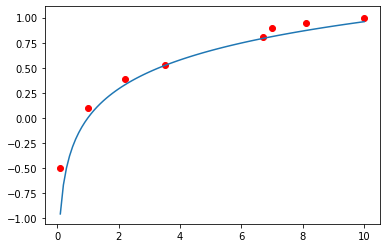

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.1, 1.0, 2.2, 3.5, 6.7, 7.0, 8.1, 10.0]
y = [-0.5, 0.10, 0.39, 0.53, 0.81, 0.90, 0.95, 1.0]

a, b = np.polyfit(np.exp(x), y, 1)
x_ny = np.linspace(0.1,10,100)
y_tilpasset = a + b*np.log(x_ny)

plt.scatter(x, y, color = 'red')
plt.plot(x_ny, y_tilpasset)
plt.show()

### Oppgave 5
**Feilretting:** Her er titlene på tabellkolonnene byttet om på. Den første kolonnen skal være tid, den andre skal være antall atomkjerner.

I denne oppgava kommer _polyfit_ til kort, og vi får behov for å søke opp en ny funksjon. Ved å søke på internett kan vi finne ut at funksjonen _curve\_fit_ kan være nyttig til dette formålet. Teknikken er omtrent den samme som ved bruk av _polyfit_. Den brukes slik:

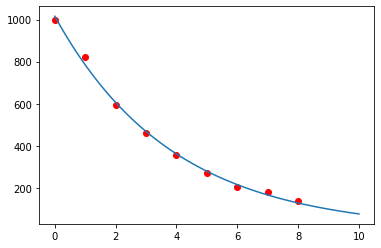

In [54]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

tid = [x for x in range(9)]     # Kort måte å fylle opp listene på! Skriv gjerne inn manuelt.
atomkjerner = [1000, 820, 595, 463, 359, 272, 205, 180, 137] # Tid  i år

def modell(x,a,b):
    return a*np.exp(b*x)

reg = curve_fit(modell, tid, atomkjerner)[0] # Element 1 har her kun med feilanalyse å gjøre
x = np.linspace(0,10,100)
y = reg[0]*np.exp(reg[1]*x)

plt.scatter(tid, atomkjerner, color = 'red')
plt.plot(x, y)
plt.show()


## Gjennomsnitt, median, typetall og standardavvik
_Kommer_

## Logiske operasjoner på arrayer
_Kommer_

## Tilfeldige tall

### Oppgave 12

In [6]:
from numpy.random import randint

def terningkast(N):
    return randint(1, N+1)    

### Oppgave 13

In [7]:
from numpy.random import randint

# Ti tilfeldige tall:
summen = 0
for i in range(10):
    summen += randint(1, 7)
snitt = summen/10
print(summen)

# Hundre tilfeldige tall:
summen = 0
for i in range(100):
    summen += randint(1, 7)
snitt = summen/100
print(summen)

44
359


## Statistiske simuleringer

### Oppgave 14

In [8]:
def rel_frekvens(kast):
    ant_seks = 0
    for i in range(kast):
        tall = randint(1, 7)
        if tall == 6:
            ant_seks += 1
    return ant_seks/kast

print(rel_frekvens(10))
print(rel_frekvens(100))
print(rel_frekvens(1000))
print(rel_frekvens(10000))

0.1
0.23
0.167
0.1692


### Oppgave 15

Det mest sannsynlige antallet kast vi trenger er 36.8529


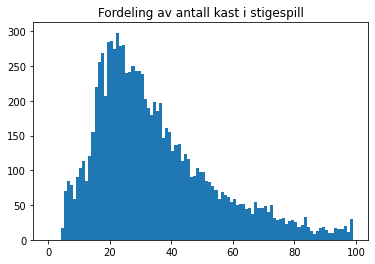

In [30]:
import numpy as np
# spill_stigespill-funksjonen fra kapittel 7.7
stiger = [
    (1, 40), (8, 10), (24, 5),
    (33, 3), (36, 52), (42, 30),
    (43, 62), (49, 79), (56, 37),
    (64, 27), (65, 82), (68, 85),
    (74, 12), (87, 70)]

def spill_stigespill(): 
    posisjon = 0
    antall_kast = 0 
    while posisjon < 90:
        terningkast = np.random.randint(1, 7) 
        antall_kast += 1
        posisjon += terningkast
        for stige in stiger:
           if stige[0] == posisjon:
              posisjon = stige[1]
              break;
    return antall_kast

N = 10000
sum_kast = 0
spill_over_hundre = 0
antall_kast_alle = []
for i in range(N):
    antall_kast = spill_stigespill()
    sum_kast += antall_kast
    antall_kast_alle.append(antall_kast)
    if antall_kast > 100:
        spill_over_hundre += 1

snitt_kast = sum_kast/N

# (a)
import matplotlib.pyplot as plt
plt.hist(antall_kast_alle, bins=np.arange(100))
plt.title("Fordeling av antall kast i stigespill")
print("Det mest sannsynlige antallet kast vi trenger er", snitt_kast)

Vi ser av histogrammet at det vanligste antallet kast er omtrent 20. 

**b)**

In [31]:
print("Gjennomsnittlig antall kast er", snitt_kast)

Gjennomsnittlig antall kast er 36.8529


**c)**

In [32]:
print("Halvparten av stigespill spilles på under", snitt_kast, "kast")

Halvparten av stigespill spilles på under 36.8529 kast


**d)**

In [34]:
print(spill_over_hundre, "av", N, "stigespill krever mer enn 100 kast.")

273 av 10000 stigespill krever mer enn 100 kast.
